In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
from auxFunctions import readExportToPd
import seaborn as sns
sns.set_context('talk')

In [11]:
data = readExportToPd()

In [12]:
data.head()

,g,d.parameters.campaign,d.parameters.locationSurrounding,d.parameters.team,d.parameters.motive,d.parameters.targetGroup,d.coordinates._latitude,d.coordinates._longitude,d.deletedAt._seconds,d.deletedAt._nanoseconds,...,d.location._longitude,d.removedBy,d.updatedAt._seconds,d.updatedAt._nanoseconds,d.updatedBy,d.state,l._latitude,l._longitude,d.deletedBy,campaign
0,u1wbxq8usv,Bürgerschaftswahl Hamburg 2020,"[Wohnen, Einkaufen, Durchgangsstrasse]",Team West,Lina,"[Fußgänger, Radfahrer, Autofahrer]",53.561896,9.812026,1.582969e+09,456000000.0,...,9.812026,OFdUjpbNLXZoeRPWB5YjxRxjzRH3,1580044678,280000000,OFdUjpbNLXZoeRPWB5YjxRxjzRH3,removed,53.561896,9.812026,NaN,Bürgerschaftswahl Hamburg 2020
1,u284phpwud,Kommunalwahl München 2020,NaN,NaN,NaN,NaN,48.187206,11.568115,1.584640e+09,136000000.0,...,11.568115,qk3RwE5WEUNbPk85eTf18Lu4JY32,1580056006,182000000,ihPzNAGmQdatZW7rFD8q3cNubuS2,removed,48.187206,11.568115,NaN,Kommunalwahl München 2020
2,u281zdht22,NaN,[Strasse],NaN,Umwelt + Wohnen,"[Autofahrer, Fußgänger, Radfahrer]",48.132008,11.585783,NaN,NaN,...,NaN,NaN,1578829812,698000000,psfZAjTSV5Stlfwj4Og2ihxSVqn1,active,48.132008,11.585783,NaN,nan
3,u1x0ebphc5,Bürgerschaftswahl Hamburg,NaN,NaN,Hafen + Wohnen,NaN,53.526223,10.018206,1.582981e+09,978000000.0,...,10.018206,NISiXJvou2OIg0ygvLTQni8z6Gm1,1579958449,348000000,vRs7bqLgbaZOrY9viLatNAzZrgD2,removed,53.526223,10.018206,NaN,Bürgerschaftswahl Hamburg
4,u284hyjp09,Kommunalwahl München 2020,[Wohnen],Team Dachau,Mobilität + Umwelt,"[Radfahrer, Fußgänger]",48.198231,11.465639,1.584808e+09,182000000.0,...,11.465639,HgM385Ff84YmItF4qjVY8OGvuih2,1582474831,797000000,RwRvY0PtsoYOgcf3a7xxHfrV7YA3,removed,48.198231,11.465639,NaN,Kommunalwahl München 2020


In [28]:
muc = gpd.read_file('./Files/Stadtbezirke_Munich/Stadtbezirke.shp')
#Needs conversion to coordinate systems
muc = muc.to_crs(epsg=4326)

In [22]:
muc.head()

,OBJECTID,X,Y,SB_NUMMER,NAME,FLAECHE_QM,SHAPE_AREA,SHAPE_LEN,geometry
0,1,4461544.744,5330721.58,20,Hadern,9.223730e+06,0.0,0.0,"POLYGON Z ((11.47803 48.13055 0.00000, 11.4786..."
1,2,4473173.450,5335687.63,13,Bogenhausen,2.370984e+07,0.0,0.0,"POLYGON Z ((11.67429 48.18192 0.00000, 11.6745..."
2,3,4469018.360,5333557.07,01,Altstadt-Lehel,3.145668e+06,0.0,0.0,"POLYGON Z ((11.59127 48.15649 0.00000, 11.5915..."
3,4,4467704.290,5334584.76,03,Maxvorstadt,4.297904e+06,0.0,0.0,"POLYGON Z ((11.56400 48.15693 0.00000, 11.5657..."
4,5,4473175.260,5329129.07,16,Ramersdorf-Perlach,1.989496e+07,0.0,0.0,"POLYGON Z ((11.60092 48.12438 0.00000, 11.6010..."


In [23]:
form = data[['l._longitude', 'l._latitude', 'd.parameters.team', 'campaign']]
form.columns = ['longitude', 'latitude', 'team', 'campaign']

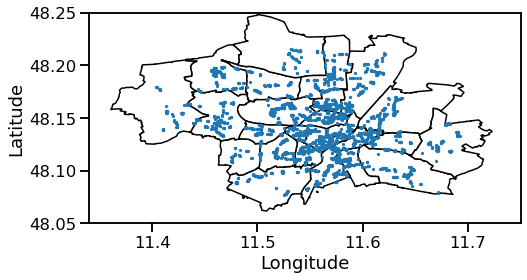

In [27]:
#Just plotting the campaigns
fig, ax = plt.subplots(figsize=(8,7))
muc.plot(ax=ax, color='white', edgecolor='black')

ax.scatter(form['longitude'], form['latitude'], s=3)

ax.set_xlim(11.34, 11.75)
ax.set_ylim(48.05, 48.25)
ax.set_aspect(1)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

plt.tight_layout()

plt.savefig('./Figures/test_shp1.png', dpi=300, )
plt.show()